In [2]:
import tensorflow as tf
import numpy as np
import os
import skimage

In [25]:
path = "croppedImages/"

num = 24678 #ca 24 600 in folder

dataset = []

for img in range(1,num + 1): 
    img_array = skimage.util.img_as_float32(skimage.io.imread(path + str(img) + ".png"))
    dataset.append(img_array.flatten())

print(len(dataset))

24678


In [26]:
import random

random.shuffle(dataset)

dataset = np.array(dataset)

training = np.array(dataset [0:int(num*0.8)])
testing = np.array(dataset [int(num*0.8):])
dataset = np.array(dataset)

print(training.shape)
print(testing.shape)

(19742, 3072)
(4936, 3072)


In [27]:
#Dense autencoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = 'Dense-AE-8x8-' + str(time.time())
tensorboard = TensorBoard(log_dir='logs/' + NAME)

model = Sequential()

model.add(Dense(16*16*3, input_dim=training.shape[1], activation='relu'))
model.add(Dense(8*8*3, activation='relu'))
#model.add(Dense(4*4*3, activation='relu'))
#model.add(Dense(8*8*3, activation='relu'))
model.add(Dense(16*16*3, activation='relu'))
model.add(Dense(training.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(dataset,dataset,batch_size = 64, verbose=1,epochs=10, validation_split=0.01, callbacks=[tensorboard])

Train on 24431 samples, validate on 247 samples
Epoch 1/10
24431/24431 [==============================] - 22s 891us/sample - loss: 0.0262 - val_loss: 0.0176
Epoch 2/10
24431/24431 [==============================] - 21s 876us/sample - loss: 0.0161 - val_loss: 0.0156
Epoch 3/10
24431/24431 [==============================] - 22s 900us/sample - loss: 0.0149 - val_loss: 0.0155
Epoch 4/10
24431/24431 [==============================] - 21s 879us/sample - loss: 0.0145 - val_loss: 0.0146
Epoch 5/10
24431/24431 [==============================] - 21s 864us/sample - loss: 0.0144 - val_loss: 0.0151
Epoch 6/10
24431/24431 [==============================] - 21s 876us/sample - loss: 0.0143 - val_loss: 0.0143
Epoch 7/10
24431/24431 [==============================] - 21s 872us/sample - loss: 0.0142 - val_loss: 0.0146
Epoch 8/10
24431/24431 [==============================] - 21s 846us/sample - loss: 0.0143 - val_loss: 0.0161
Epoch 9/10
24431/24431 [==============================] - 20s 813us/sample - los

Score neural network


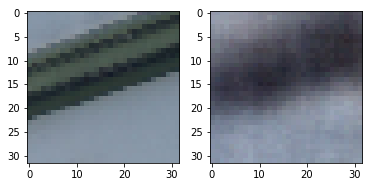

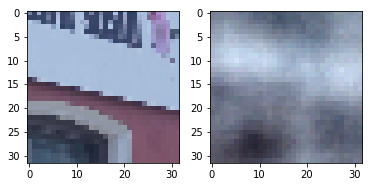

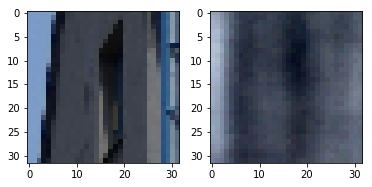

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


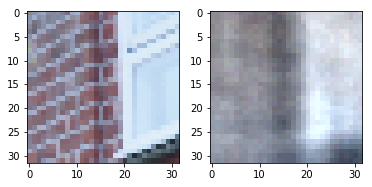

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


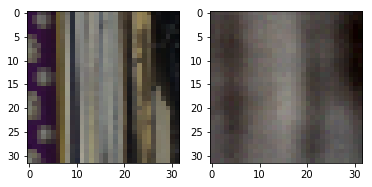

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


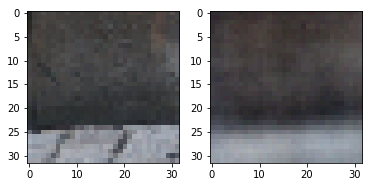

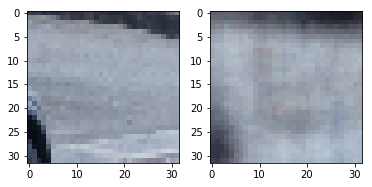

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


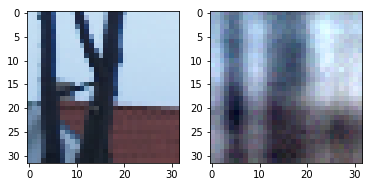

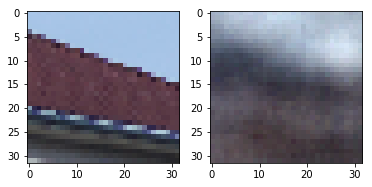

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


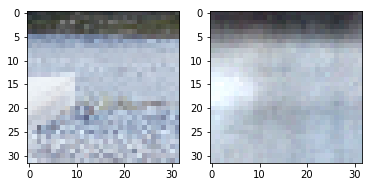

In [11]:
print("Score neural network")
pred = model.predict(testing)

cols,rows = 32,32
for i in range(10):
    predicted = pred[i].reshape(rows,cols,3)
    original = testing[i].reshape(rows,cols,3)   
    
    skimage.io.imshow_collection([original,predicted])
    skimage.io.show()